In [94]:
# Se importan las librerías:
import pandas as pd # manejo y análisis de estructuras de datos - acceso a los datos como indices, nombres, filas y columnas
import numpy as np # cálculo numérico y analisi de datos - procesamiento eficiente de arrays
import matplotlib.pyplot as plt # creación de gráficos de dos dimensiones
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [95]:
# Se carga el dataSet en un dataFrame
df = pd.read_csv("./Dataset_Titanic/train.csv")

In [96]:
# Mostrar el dataFrame - Las primeras 5 filas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
# Se eliminan columnas que nbo se vana a usar
delete_columns = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin']
df.drop(delete_columns, axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [98]:
df['Sex']=df['Sex'].map({ # Para ver mejor los datos, se cambia los valores 1  por 'si' y 0 por 'no'
'male': 1,
'female': 2
})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,2,38.0,1,0,C
2,1,3,2,26.0,0,0,S
3,1,1,2,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [99]:
#Se asigna No Especificado (NE) para los campos vacíos en esta columna
df['Embarked']=df['Embarked'].fillna('NE')

In [100]:
df['Embarked']=df['Embarked'].map({ # Para ver mejor los datos, se cambia los valores S, C y Q por el nombre completo de la ciudad de embarque
'NE': int(0),
'S': int(1),
'C': int(2),
'Q': int(3)
})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,1
1,1,1,2,38.0,1,0,2
2,1,3,2,26.0,0,0,1
3,1,1,2,35.0,1,0,1
4,0,3,1,35.0,0,0,1


In [101]:
mediaEdades=round(df['Age'].mean()) # Se haya busca la media de las edades
df['Age']=df['Age'].fillna(mediaEdades) #Se asigna la media de las edades para asignarselas a los campos vacíos
df['Age']=df['Age'].astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22,1,0,1
1,1,1,2,38,1,0,2
2,1,3,2,26,0,0,1
3,1,1,2,35,1,0,1
4,0,3,1,35,0,0,1


In [102]:
nf = df.shape[0]
print("El DataFrame tiene", nf, "filas")

El DataFrame tiene 891 filas


In [103]:
# Se separan las características de la variable objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

In [104]:
# Dividir el conjunto de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [105]:
# Se crea un modelo de árbol de decisión y se entrena con el conjunto de datos de entrenamiento
ad = DecisionTreeClassifier(random_state = 1)
ad.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [106]:
# Evaluar el modelo de conjunto de datos de prueba para hacer predicciones
y_pred = ad.predict(X_test)

In [107]:
# Evaluar el desempeño del modelo
precision = accuracy_score(y_test, y_pred)
print("La precisión del modelo es:", precision)

La precisión del modelo es: 0.7649253731343284


In [108]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [109]:
conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Diego\anaconda3

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




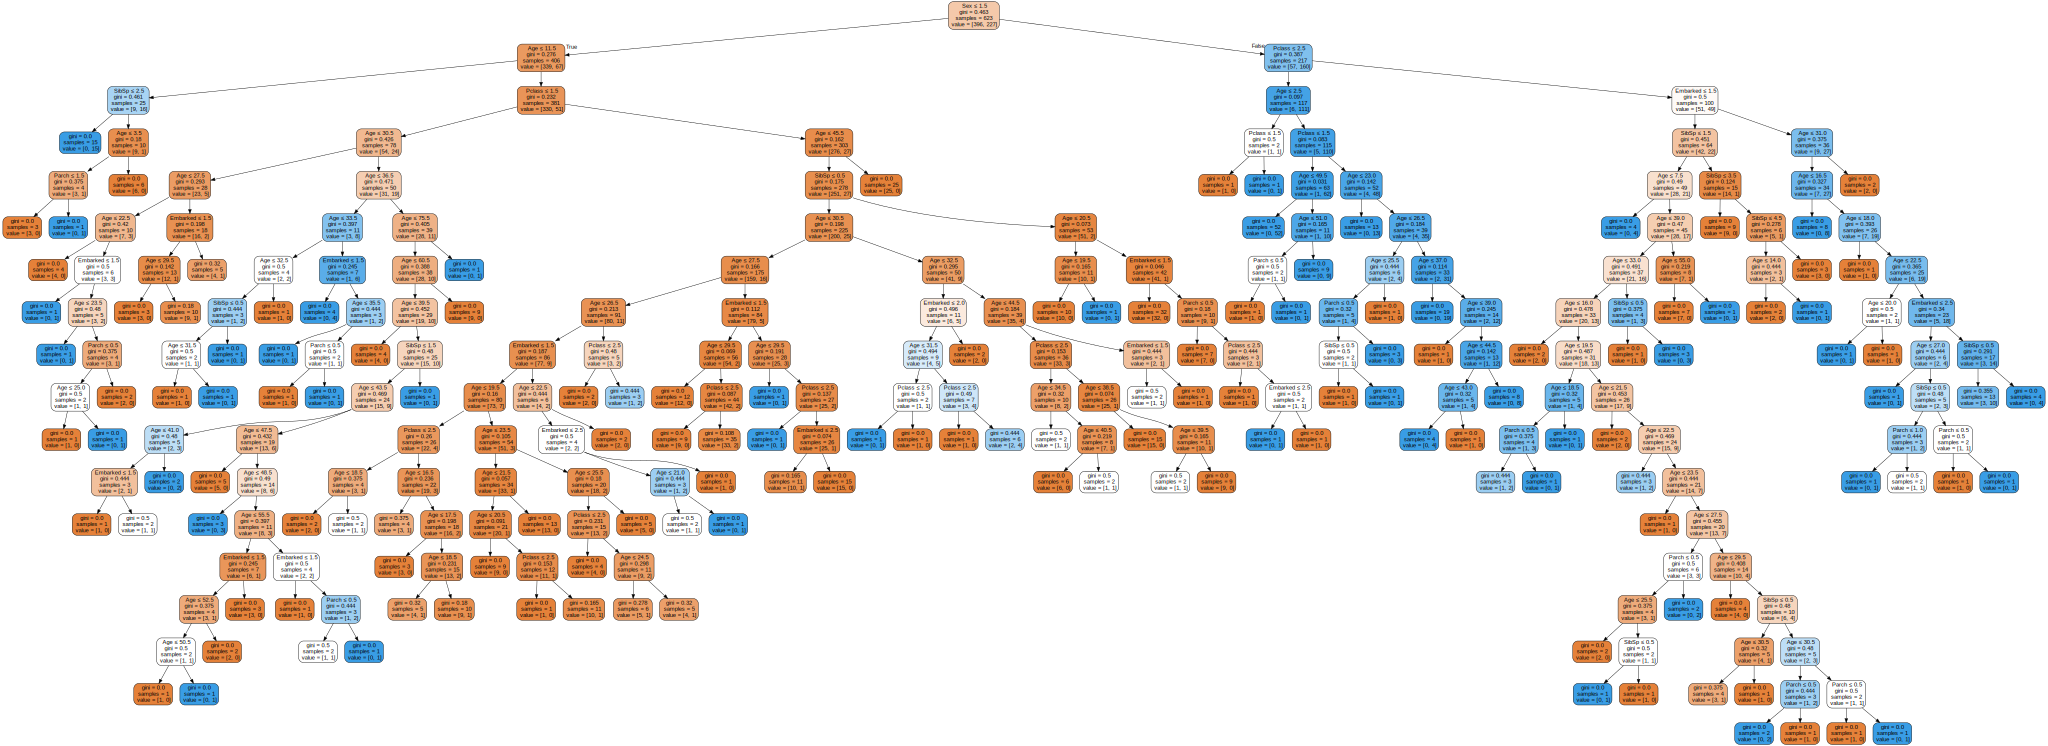

In [111]:
from sklearn.tree import export_graphviz
import graphviz

#Exportar el árbol de decisión a un archivo .dot
export_graphviz(ad, out_file='arbol_decision_titanic.dot', feature_names=X.columns.values, filled=True, rounded=True, special_characters=True)

#Convertir archivo dot a graphviz
with open('arbol_decision.dot') as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
# Mostrar árbol de decisiones
graph

In [112]:
from IPython.display import Image
from graphviz import render

# generar imagen de árbol de decisión
render('dot', 'png', 'arbol_decision_titanic.dot')

'arbol_decision_titanic.dot.png'

In [113]:
from sklearn.tree import DecisionTreeClassifier
ad = DecisionTreeClassifier(max_depth = 3, min_samples_split = 10)
ad.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

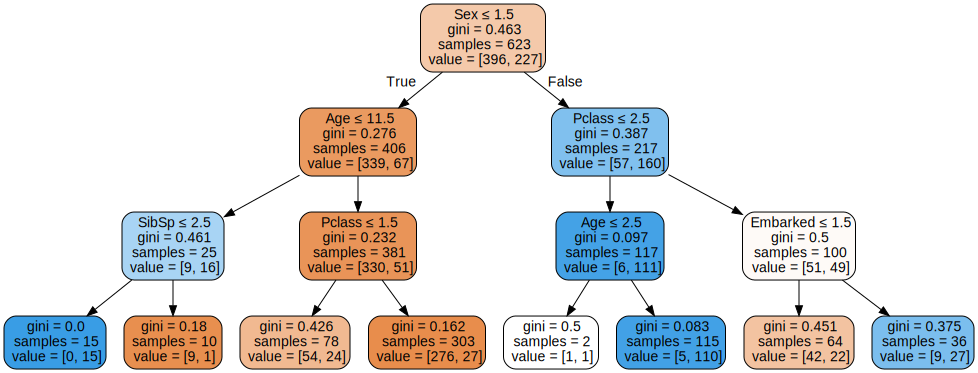

In [114]:
from sklearn.tree import export_graphviz
import graphviz

#Exportar el árbol de decisión a un archivo .dot
export_graphviz(ad, out_file = 'arbol_decision.dot', feature_names = X.columns.values, filled=True, rounded=True, special_characters=True)

#Convertir archivo dot a graphviz
with open('arbol_decision.dot') as f:
    dot_graph = f.read()
    graph = graphviz.Source(dot_graph)
# Mostrar árbol de decisiones
graph

In [115]:
from IPython.display import Image
from graphviz import render

# generar imagen de árbol de decisión
render('dot', 'png', 'arbol_decision_titanic.dot')

'arbol_decision_titanic.dot.png'